In [1]:
%matplotlib inline
import pandas as pd
idx = pd.IndexSlice

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
%%time
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)

CPU times: user 13.1 s, sys: 571 ms, total: 13.7 s
Wall time: 13.7 s


In [4]:
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [5]:
%%time
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)

CPU times: user 1.75 s, sys: 52.2 ms, total: 1.81 s
Wall time: 1.8 s


In [6]:
release_dates.head()

,title,year,country,date
0,0_1_0,2008,Poland,2008-11-14
1,Ai no Sanka,1967,Japan,1967-01-01
2,A Thousand to One,1920,USA,1920-12-05
3,A Prince of a King,1923,USA,1923-10-13
4,A Prince of a King,1923,Netherlands,1924-08-08


In [7]:
titles = cast[['title', 'year']].drop_duplicates().reset_index(drop=True)
titles.head()

,title,year
0,The Core,2003
1,Il momento di uccidere,1968
2,Across the Divide,1921
3,Revan,2012
4,Un homme marche dans la ville,1950


### Years

In [8]:
# 1. How many movies are listed in the `titles` dataframe?

len(titles)

214386

In [9]:
# 1. What is the name and year of the very first movie ever made?

titles.sort('year').head(1)

,title,year
100983,Miss Jerry,1894


In [10]:
# 1. How many years into the future does the IMDB database list movie titles?

titles.sort('year').tail(3)#.year - 2015

,title,year
208386,The Understander,2021
200027,Model Combat,2021
208929,Edge of Time,2021


In [11]:
# 1. How many movies listed in `titles` came out in 1950?

len(titles[titles.year == 1950])

# or: (titles.year == 1950).sum()

1158

In [12]:
# 1. How many movies came out in 1960?

len(titles[titles.year == 1960])

1441

In [13]:
# 1. How many movies came out in each year of the 1970s?
#    (Hint: try a Python "for" loop.)

for y in range(1970, 1980):
    print(y, (titles.year == y).sum())

1970 1876
1971 1774
1972 1840
1973 1813
1974 1795
1975 1704
1976 1716
1977 1686
1978 1679
1979 1757


In [14]:
# 1. How many movies came out during your own lifetime,
#    from the year of your birth through 2014?

len(titles[(titles.year >= 1974) & (titles.year <= 2014)])

127060

In [137]:
# 2. Use "value_counts" to determine how many movies came out
#    in each year of the 1970s.

titles[titles.year // 10 == 197].year.value_counts().sort_index()

1970    1876
1971    1774
1972    1840
1973    1813
1974    1795
1975    1704
1976    1716
1977    1686
1978    1679
1979    1757
dtype: int64

In [18]:
# 3. Use "groupby" to determine how many movies came out in each year of the 1970s.

titles.groupby('year').size().loc[1970:1979]

year
1970    1876
1971    1774
1972    1840
1973    1813
1974    1795
1975    1704
1976    1716
1977    1686
1978    1679
1979    1757
dtype: int64

### Titles

In [19]:
# 1. What are the names of the movies made through 1906?

titles[titles.year <= 1906][['title']]

,title
100983,Miss Jerry
104766,Soldiers of the Cross
140912,Can Can
142404,The Story of the Kelly Gang
173490,Jeffries-Sharkey Contest
173746,Valsons
173859,The Joe Gans-Battling Nelson Fight
174032,Battle of Jeffries and Sharkey for Championshi...
174343,Sr. Wrangler Mr. R.P. Paranjpe
205246,Lika mot lika


In [20]:
# 1. What movies have titles that fall between Star Trek and Star Wars in the alphabet?

titles[(titles.title >= 'Star Trek') & (titles.title <= 'Star Wars')]

,title,year
2056,Star Wars,1977
9814,Star Trek,2009
9886,Star Trek Into Darkness,2013
27553,Star Trek III: The Search for Spock,1984
29784,Star Trek: The Wrath of Khan,1982
30814,Star Trek: The Motion Picture,1979
33378,Star Trek: Nemesis,2002
39810,Star Trek: First Contact,1996
39824,Star Trek: Generations,1994
59379,Star Trek VI: The Undiscovered Country,1991


In [22]:
# 2. Use an index and .loc[] to find the movies whose titles fall between Star Trek
#    and Star Wars in the alphabet.

t = titles.copy()
t = t.set_index('title').sort_index()
t.loc['Star Trek':'Star Wars']

,year
title,
Star Trek,2009
Star Trek I: Specter of the Past,2010
Star Trek III: The Search for Spock,1984
Star Trek IV: The Voyage Home,1986
Star Trek Into Darkness,2013
Star Trek V: The Final Frontier,1989
Star Trek VI: The Undiscovered Country,1991
Star Trek World Tour,1998
Star Trek: First Contact,1996


In [23]:
# 2. Use an index and .loc[] to retrieve the names of the movies made through 1906.

titles.set_index('year').sort_index().loc[1800:1906]

,title
year,
1894,Miss Jerry
1898,Can Can
1899,Jeffries-Sharkey Contest
1899,Battle of Jeffries and Sharkey for Championshi...
1900,Soldiers of the Cross
1902,Sr. Wrangler Mr. R.P. Paranjpe
1905,Valsons
1905,Eine Fliegenjagd oder Die Rache der Frau Schultze
1906,The Story of the Kelly Gang


In [21]:
# 2. What are the 15 most common movie titles in film history?

titles.title.value_counts().head(15)

Hamlet           17
Carmen           14
Macbeth          14
Anna Karenina    12
Maya             11
Underground      11
Blood Money      10
The Outsider     10
She              10
Temptation       10
Anna             10
Othello          10
Revenge          10
Jackpot          10
Paradise          9
dtype: int64

In [24]:
# Use this for session 3?

i = cast.set_index('name').sort_index()

n              
     min      mean max
year                  
1932   1  5.125000   9
1933   1  3.166667  10
1934   1  1.500000   2
1935   1  1.750000   2
1936   1  1.750000   3
1937   2  2.000000   2
1938   2  2.000000   2
1939   1  1.333333   2
1940   1  1.250000   2
1941   1  1.500000   2
1942   1  1.000000   1
1943   1  1.000000   1
1944   1  1.000000   1
1945 NaN       NaN NaN
1946   1  1.000000   1
1947   1  1.000000   1
1948   1  1.000000   1
1949   1  1.000000   1
1950   1  1.000000   1
1951   1  1.000000   1
1952   1  1.000000   1
1953   1  1.000000   1
1955   1  1.000000   1
1957   1  1.000000   1
1958   1  1.000000   1
1959   1  1.000000   1
1960   1  1.000000   1
1962   1  1.000000   1
1963   1  1.000000   1
1964   1  1.000000   1
1966   1  1.000000   1
1981 NaN       NaN NaN
1987 NaN       NaN NaN
1988 NaN       NaN NaN
2002 NaN       NaN NaN

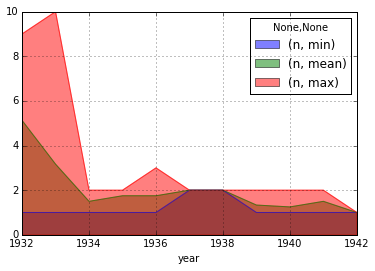

In [25]:
a = i.loc['Cary Grant',['year','n']].groupby('year').agg(['min', 'mean', 'max'])
a.loc[:1942].plot(kind='area', stacked=False)
a

In [26]:
# 5. What are the 5 longest movie titles ever?

pd.set_option('max_colwidth', 300)

t = titles.copy()
t['len'] = t.title.str.len()
t = t.sort('len', ascending=False)
t.head()

,title,year,len
163401,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil Mutant Hellbound Flesh Eating Crawling Alien Zombified Subhumanoid Living Dead, Part 5",2011,208
154042,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil, Mutant, Hellbound, Flesh-Eating Subhumanoid Zombified Living Dead, Part 3",2005,196
120466,Las poquianchis (De los pormenores y otros sucedidos del dominio público que acontecieron a las hermanas de triste memoria a quienes la maledicencia así las bautizó),1976,165
40308,Entrei em Pânico ao Saber o que Vocês Fizeram na Sexta-feira 13 do Verão Passado Parte 2 - A Hora da Volta da Vingança dos Jogos Mortais de Halloween,2011,149
173052,Die Antigone des Sophokles nach der Hölderlinschen Übertragung für die Bühne bearbeitet von Brecht 1948 (Suhrkamp Verlag),1992,121


In [27]:
# 5. What are the 15 most popular movie titles, if you strip off the suffixes like
#    (II) and (III) that the IMDB adds to distinguish movies shown in the same year?

titles.title.str.extract('^([^(]*)').value_counts().head(15)

                 24
Hamlet           17
Broken           15
Macbeth          14
Carmen           14
Anna Karenina    12
Underground      11
Maya             11
Blood Money      10
Othello          10
Revenge          10
Alone            10
The Outsider     10
Jackpot          10
Anna             10
dtype: int64

### How many movies actors have been in

In [28]:
# 1. How many movies has Judi Dench acted in?

len(cast[cast.name == 'Judi Dench'])

51

In [142]:
# 1. How many movies did Sidney Poitier appear in?

c = cast
c = c[c.name == 'Sidney Poitier']
len(c)

43

In [145]:
# 1. In how many of his movies was Sidney Poitier the lead (`n==1`)?

c = cast
c = c[c.name == 'Sidney Poitier']
c = c[c.n == 1]
len(c)

21

### Pulling and displaying movie credits

In [147]:
# 1. List the movies, sorted by year, in which Judi Dench starred as lead actor.

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.n == 1]
c.sort('year')

,title,year,name,type,character,n
1762207,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1
3110457,Ladies in Lavender,2004,Judi Dench,actress,Ursula,1
3407847,Mrs Henderson Presents,2005,Judi Dench,actress,Mrs. Laura Henderson,1
3363284,Notes on a Scandal,2006,Judi Dench,actress,Barbara Covett,1
3363282,The Best Exotic Marigold Hotel,2011,Judi Dench,actress,Evelyn Greenslade,1
2702221,Philomena,2013,Judi Dench,actress,Philomena,1


In [148]:
# 1. Who was credited in the 1972 version of Sleuth, in order by `n` rank?

c = cast
c = c[c.title == 'Sleuth']
c = c[c.year == 1972]
c.sort('n')

,title,year,name,type,character,n
2815436,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1
1985454,Sleuth,1972,Michael Caine,actor,Milo Tindle,2
2004531,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
2707118,Sleuth,1972,John Matthews (II),actor,Detective Sergeant Tarrant,4
3292963,Sleuth,1972,Eve Channing (III),actress,Marguerite Wyke,5
2693963,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6


### Common character names

In [207]:
# 2. What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself      24293
Dancer       11697
Extra         8865
Reporter      7792
Doctor        7666
Herself       7501
Policeman     7245
Student       6694
Nurse         6636
Bartender     6298
Zombie        5785
dtype: int64

In [167]:
# 3. Which actors have played the role “Zombie” the most times?

c = cast
c = c[c.character == 'Zombie']
c = c.groupby('name').size().order()
c.tail(5)

name
Richard Ricci         3
Colin Murtagh         3
Terry Gindele         3
Samuel R. Solito      3
John Migliore (II)    6
dtype: int64

In [168]:
# 3. Which ten people have appeared most often as “Herself” over the history of film?

c = cast
c = c[c.character == 'Herself']
c = c.groupby('name').size().order()
c.tail(10)

name
Mary Jo Pehl           7
Cosey Fanni Tutti      7
Brigitte Bardot        7
Petula Clark           7
Joan Rivers            8
Queen Mary             8
Margaret Thatcher      9
Denise Austin         10
Joyce Brothers        14
Queen Elizabeth II    14
dtype: int64

In [264]:
# 3. Which ten people have appeared most often as “Himself” over the history of film?

c = cast
c = c[c.character == 'Himself']
c = c.groupby('name').size().order()
c.tail(10)

name
Bill Clinton              22
Josip Broz Tito           23
Franklin D. Roosevelt     23
George W. Bush            24
Ron Jeremy                24
Amitabh Bachchan          25
Ronald Reagan             30
John F. Kennedy           33
Richard Nixon             43
Adolf Hitler             104
dtype: int64

In [269]:
# 4. Take the 50 most common character names in film.
#    Which are most often played by men?

c = cast
clist = c.character.value_counts().head(50)
clist.head()

Himself     24293
Dancer      11697
Extra        8865
Reporter     7792
Doctor       7666
dtype: int64

In [270]:
clist.tail()

Frank      2355
Teacher    2313
Tom        2282
Mary       2278
Sarah      2251
dtype: int64

In [252]:
cast_by_character = cast.sort('character').set_index('character')

In [271]:
c = cast_by_character.loc[clist.index][['type']]
c = c.reset_index()
c = c.groupby(['character', 'type']).size()
c = c.unstack()
c['ratio'] = c.actress / (c.actor + c.actress)
c = c.sort('ratio')
c.head()

type,actor,actress,ratio
character,,,
Townsman,4963,3,0.000604
John,2628,2,0.000760
Henchman,4876,4,0.000820
Policeman,7233,12,0.001656
Himself,24251,42,0.001729


In [272]:
# 4. …which of those 50 characters are most often played by women?

c.tail()

type,actor,actress,ratio
character,,,
Anna,86,2868,0.970887
Mary,46,2232,0.979807
Girl,43,2513,0.983177
Maria,27,3080,0.991310
Herself,59,7442,0.992134


In [273]:
# 4. …which of those 50 characters have a ratio closest to 0.5?

c[(c.ratio > 0.4) & (c.ratio < 0.6)]

type,actor,actress,ratio
character,,,
Student,3845,2849,0.425605
Singer,1706,1811,0.514927
Teacher,1079,1234,0.533506


### Who has been in the most movies

In [178]:
# 2. Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam Harris (II)    30
Harold Miller      28
Bess Flowers       28
Nolan Leary        27
Frank O'Connor     26
Pierre Watkin      24
Tom London         24
Franklyn Farnum    24
Edmund Cobb        24
dtype: int64

In [179]:
# 2. Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Mammootty           34
Shakti Kapoor       26
Mohanlal            22
Sukumari            19
Satyendra Kapoor    17
Asrani              16
Kader Khan          16
Rajesh Khanna       15
Raj Babbar          15
Aruna Irani         15
dtype: int64

In [182]:
%%time
# 2. Create a `cast_by_title_year` dataframe indexed by title and year
#    to use in the next few questions.

cast_by_title_year = cast.set_index(['title', 'year']).sort_index()
cast_by_title_year.head()

CPU times: user 15.4 s, sys: 932 ms, total: 16.4 s
Wall time: 17.6 s


In [186]:
%%time
# 2. Use `cast_by_title_year` to find the stars of the film Inception
#    and order them by `n` before displaying the top 10.

cast_by_title_year.loc['Inception'].sort('n').head(10)

CPU times: user 36.6 ms, sys: 45 µs, total: 36.6 ms
Wall time: 39.1 ms


,name,type,character,n
year,,,,
2010,Leonardo DiCaprio,actor,Cobb,1
2010,Joseph Gordon-Levitt,actor,Arthur,2
2010,Ellen Page,actress,Ariadne,3
2010,Tom Hardy,actor,Eames,4
2010,Ken Watanabe,actor,Saito,5
2010,Dileep Rao,actor,Yusuf,6
2010,Cillian Murphy,actor,Robert Fischer,7
2010,Tom Berenger,actor,Browning,8
2010,Marion Cotillard,actress,Mal,9


In [188]:
# 2. Use `cast_by_title_year` to find the first 10 stars in the 1996 film Hamlet,
#    and order them by `n`.

cast_by_title_year.loc['Hamlet',1996].sort('n').head(10)

name     type                 character   n
title  year                                                             
Hamlet 1996            Riz Abbasi    actor     Attendant to Claudius   1
       1996  Richard Attenborough    actor        English Ambassador   2
       1996       David Blair (V)    actor     Attendant to Claudius   3
       1996         Brian Blessed    actor  Ghost of Hamlet's Father   4
       1996       Kenneth Branagh    actor                    Hamlet   5
       1996        Richard Briers    actor                  Polonius   6
       1996        Michael Bryant    actor                    Priest   7
       1996          Peter Bygott    actor     Attendant to Claudius   8
       1996        Julie Christie  actress                  Gertrude   9
       1996         Billy Crystal    actor         First Gravedigger  10

In [189]:
%%time
# 2. Write a `for` loop that, for the top 9 actors in the 1977 movie Star Wars,
#    determines how many movies they starred in after 1977.

names = cast_by_title_year.loc['Star Wars',1977].sort('n').head(9).name
for name in names:
    print(name, len(cast[(cast.name == name) & (cast.year > 1977)]))

Mark Hamill 42
Harrison Ford 44
Carrie Fisher 40
Peter Cushing 10
Alec Guinness 9
Anthony Daniels 11
Kenny Baker 18
Peter Mayhew (II) 7
David Prowse 5
CPU times: user 8.31 s, sys: 8.38 ms, total: 8.32 s
Wall time: 8.35 s


In [39]:
# 2. Create an indexed version of `cast` that, once built, lets you answer
#    the previous question with a `for` loop that finishes in under a second.

i = cast.set_index('name').sort_index()

In [197]:
%%time
for name in names:
    c = i.loc[name]
    c = c[c.year > 1977]
    #c = c[(c.character != 'Himself') & (c.character != 'Herself')]
    print(name, len(c))

Mark Hamill 42
Harrison Ford 44
Carrie Fisher 40
Peter Cushing 10
Alec Guinness 9
Anthony Daniels 11
Kenny Baker 18
Peter Mayhew (II) 7
David Prowse 5
CPU times: user 40 ms, sys: 8.48 ms, total: 48.5 ms
Wall time: 171 ms


In [200]:
# 3. How many actors were in each of the movies named "Hamlet”?

c = cast
c = c[c.title == 'Hamlet']
c = c.groupby('year').size() 
c

year
1910     1
1911     6
1913    21
1921     9
1948    25
1954     1
1964    33
1969    24
1973     8
1976    11
1987     3
1990    29
1996    55
2000    38
2009    17
2011    12
2015     6
dtype: int64

In [53]:
# 5. How many actors are in the cast of each version of Hamlet,
#    including Hamlets with IMDB name collisions like "Hamlet (II)"
#    and "Hamlet (III)"?

c = cast_by_title_year
# c.loc['Hamlet':'Hamlet (Z'].index.value_counts()    - Drat
# c.loc['Hamlet':'Hamlet (Z'].groupby(level=0).size() - Drat
# c.loc['Hamlet':'Hamlet (Z'].groupby(level=1).size() - Drat
c.loc['Hamlet':'Hamlet (Z'].groupby(level=[0,1]).size()

# Or:
#c = cast[(cast.title >= 'Hamlet') & (cast.title < 'Hamlet (Z')]
#c.groupby(['title', 'year']).size()

title         year
Hamlet        1910     1
              1911     6
              1913    21
              1921     9
              1948    25
              1954     1
              1964    33
              1969    24
              1973     8
              1976    11
              1987     3
              1990    29
              1996    55
              2000    38
              2009    17
              2011    12
              2015     6
Hamlet (II)   1964    21
              2005    20
              2007    16
              2015    10
Hamlet (III)  2007     2
              2015    14
dtype: int64

### Actors and Actresses

In [201]:
# 4. Build a dataframe with a row for each year with two columns:
#    the number of roles for actors,
#    and the number of roles for actresses in that year's films.

aa = cast[['year', 'type']].groupby(['year', 'type']).size()
aa = aa.loc[:2014].unstack()
aa.head()

type,actor,actress
year,,
1894,2,1
1898,NaN,1
1899,6,NaN
1900,2,NaN
1902,1,NaN


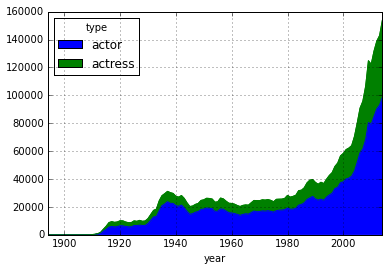

In [196]:
# 4. Use that dataframe to make a kind='area' plot showing the total
#    number of roles available over the history of film.

aa.plot(kind='area')

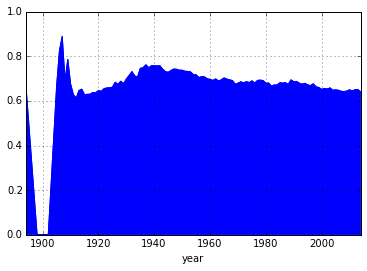

In [57]:
f = aa.actor / (aa.actor + aa.actress)
f.plot(ylim=[0,1], kind='area')

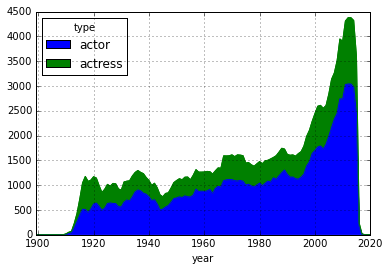

In [58]:
c = cast
#c = c[c.year // 10 == 198]
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack(1)
c.swaplevel(0,1).loc[1].plot(ylim=0, kind='area')
#f = c.actor / (c.actor + c.actress)
#f = f.unstack()
#f.plot(ylim=[0,1])

### Rank over time

In [85]:
# 2. Define “leading actor” as an actor or actress whose `n==1`
#    and “supporting actor” as `n==2` — what is the average year
#    of all the supporting roles Judi Dench has had?

c = cast
c = c[c.name == 'Judi Dench']
print(c[c.n == 2].year.mean())

1986.83333333


In [86]:
# 2. What is the average year of Judi Dench’s leading roles —
#    is her career moving forwards toward leading roles
#    or backwards towards supporting ones?

print(c[c.n == 1].year.mean())

2006.0


In [87]:
# 2. Did Sidney Poitier move forward or back over his career?

c = cast
c = c[c.name == 'Sidney Poitier']
print(c[c.n == 2].year.mean())
print(c[c.n == 1].year.mean())

1961.75
1970.47619048


In [88]:
# 2. What about Michael Caine?

c = cast
c = c[c.name == 'Michael Caine']
print(c[c.n == 2].year.mean())
print(c[c.n == 1].year.mean())

1988.38095238
1983.51923077


In [130]:
c = cast
#c = c[c.year // 10 == 195]
c = c[c.n.notnull()].groupby('name').n.agg(['size', 'mean'])
c.head()

,size,mean
name,,
!Mystery Girl!,1,29
'Ace' Reitman,1,11
'Agent' Ava Hubbard,1,29
'Amarillo Slim' Preston,1,31
'Apple' Hamidu,1,71


In [131]:
c = c[c['size'] >= 10]
c = c.sort('mean')
c.head(60)

,size,mean
name,,
Stanley Lupino,13,1.000000
Ferdi Tayfur (II),11,1.000000
Harold Lloyd,19,1.000000
Orhan Gencebay,11,1.000000
Mohamad Ali Fardin,11,1.000000
Jeyam Ravi,16,1.000000
Amácio Mazzaropi,26,1.000000
Emmy Wehlen,18,1.000000
Edna Goodrich,11,1.000000


### Release dates

In [59]:
release_dates.head()

,title,year,country,date
0,0_1_0,2008,Poland,2008-11-14
1,Ai no Sanka,1967,Japan,1967-01-01
2,A Thousand to One,1920,USA,1920-12-05
3,A Prince of a King,1923,USA,1923-10-13
4,A Prince of a King,1923,Netherlands,1924-08-08


In [60]:
rd = release_dates.set_index(['title', 'year']).sort_index()
rd.head()

,,country,date
title,year,,
"#73, Shaanthi Nivaasa",2007,India,2007-06-15
#Beings,2015,Romania,2015-01-29
#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
#Horror,2015,USA,2015-01-01
#Nerealnaya lyubov,2014,Russia,2014-02-13


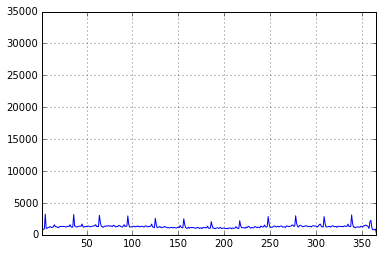

In [61]:
r = release_dates
#r = r[r.date.dt.month == 1]
r.date.dt.dayofyear.value_counts().sort_index().plot(kind='line')

In [62]:
c = cast
c = c[c.name == 'George Clooney'][['title', 'year']].drop_duplicates()
#c = c.set_index(['title', 'year']).sort_index()
c = c.join(rd, ['title', 'year'])
c = c[c.country == 'USA']
#c = c.set_index('date').sort_index()
c#.info()
#c[c.date.dt.day == 4]

,title,year,country,date
93508,The American,2010,USA,2010-09-01
326261,Return to Horror High,1987,USA,1987-01-28
335297,"O Brother, Where Art Thou?",2000,USA,2001-02-02
599280,Intolerable Cruelty,2003,USA,2003-10-10
699942,Batman & Robin,1997,USA,1997-06-20
985381,Welcome to Collinwood,2002,USA,2002-10-18
1011350,Tomorrowland,2015,USA,2015-05-22
1089133,Morning Glory,2010,USA,2010-11-10
1118641,Fantastic Mr. Fox,2009,USA,2009-11-25
1212563,Spy Kids,2001,USA,2001-03-30


In [63]:
c = cast
c = c[c.name == 'George Clooney'] #[['title', 'year']]
c = c.set_index(['title', 'year']).sort_index()
release_dates.join(c, on=['title', 'year'])

,title,year,country,date,name,type,character,n
0,0_1_0,2008,Poland,2008-11-14,NaN,NaN,NaN,NaN
1,Ai no Sanka,1967,Japan,1967-01-01,NaN,NaN,NaN,NaN
2,A Thousand to One,1920,USA,1920-12-05,NaN,NaN,NaN,NaN
3,A Prince of a King,1923,USA,1923-10-13,NaN,NaN,NaN,NaN
4,A Prince of a King,1923,Netherlands,1924-08-08,NaN,NaN,NaN,NaN
5,A Prince of a King,1923,Portugal,1925-08-17,NaN,NaN,NaN,NaN
6,Akai tenshi,1966,Japan,1966-10-01,NaN,NaN,NaN,NaN
7,Akai tenshi,1966,Netherlands,1968-03-21,NaN,NaN,NaN,NaN
8,Akai tenshi,1966,USA,1971-07-01,NaN,NaN,NaN,NaN
9,Aas Paas,1981,India,1981-01-16,NaN,NaN,NaN,NaN
